![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

### Introduction to Data Science with Python — Starter Pass

# Volcanoes facts and information visualizations

In this project, you will be practice how to create visualizations using a dataset from the [Smithsonian Institution's Global Volcanism Program (GVP)](https://volcano.si.edu/) which contains information and features of more than 1,500 volcanoes with eruptions during the Holocene period (approximately the last 10,000 years).

![volcanoe](https://user-images.githubusercontent.com/7065401/103826161-0e762c80-5055-11eb-9204-27691075c3d7.png)

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Knowing our data

Before starting it's important to load all the libraries we'll be using and understand the data we'll be working on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('volcanoes.csv')

Take a look at some records of your data, analyze columns and values:

In [17]:
df.head(60)

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
5,211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,104 BCE,42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
6,211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.730,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km)
7,211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,1538 CE,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
8,211020,Vesuvius,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,1944 CE,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction Zone / Continental Crust (>25 km)
9,211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302 CE,40.730,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)


In [6]:
df.columns

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               1508 non-null   int64  
 1   Name                 1508 non-null   object 
 2   Country              1508 non-null   object 
 3   Region               1508 non-null   object 
 4   Type                 1508 non-null   object 
 5   Activity Evidence    1507 non-null   object 
 6   Last Known Eruption  1508 non-null   object 
 7   Latitude             1508 non-null   float64
 8   Longitude            1508 non-null   float64
 9   Elevation (Meters)   1508 non-null   int64  
 10  Dominant Rock Type   1455 non-null   object 
 11  Tectonic Setting     1501 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


In [8]:
df.shape


(1508, 12)

In [10]:
df.isna().sum()

Number                  0
Name                    0
Country                 0
Region                  0
Type                    0
Activity Evidence       1
Last Known Eruption     0
Latitude                0
Longitude               0
Elevation (Meters)      0
Dominant Rock Type     53
Tectonic Setting        7
dtype: int64

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Fixing types

We can see different types of volcanoes but some of them contains `(es)`, `(s)` or `?` at the end.

Use the following Regular Expressions to replace that values with empty strings:

- `r'\((.*)\)'`: selects everything between two parentheses;
- `r'\?'`: selects `?` question mark.

In [22]:
types = { "Type": {
    r'\((.*)\)': "",
    r'\?': ""
}}

df.replace(types, regex=True, inplace=True)

In [23]:
df['Type'].value_counts()

Type
Stratovolcano         722
Shield                164
Submarine             118
Pyroclastic cone      117
Caldera                97
Volcanic field         89
Complex                55
Lava dome              50
Maar                   21
Fissure vent           18
Compound               14
Tuff cone              12
Pyroclastic shield      8
Crater rows             6
Subglacial              6
Lava cone               4
Unknown                 3
Explosion crater        2
Cone                    1
Tuff ring               1
Name: count, dtype: int64

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Show the amount of volcanoes per type using a bar plot

> Customize it! You can try different bar colors or different bars orientation, etc.

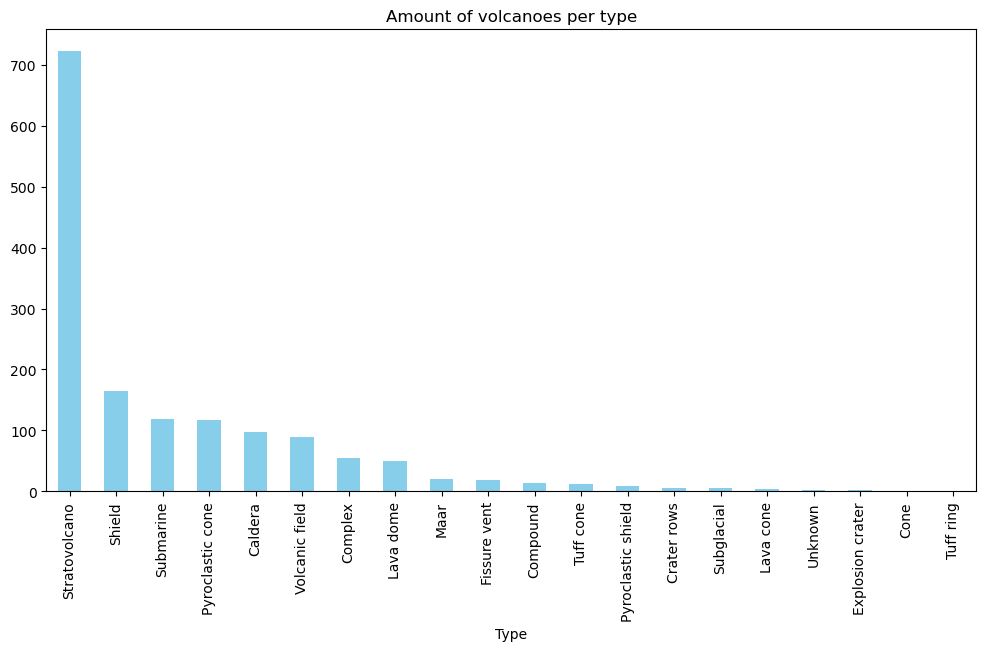

In [24]:
bartypes = df['Type'].value_counts()

bartypes.plot(kind='bar',
           color='skyblue',
           title='Amount of volcanoes per type',
           figsize=(12, 6))

plt.show()

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Show the top 10 countries with more volcanoes using a bar plot

> Customize it! You can try different bar colors or different bars orientation, etc.


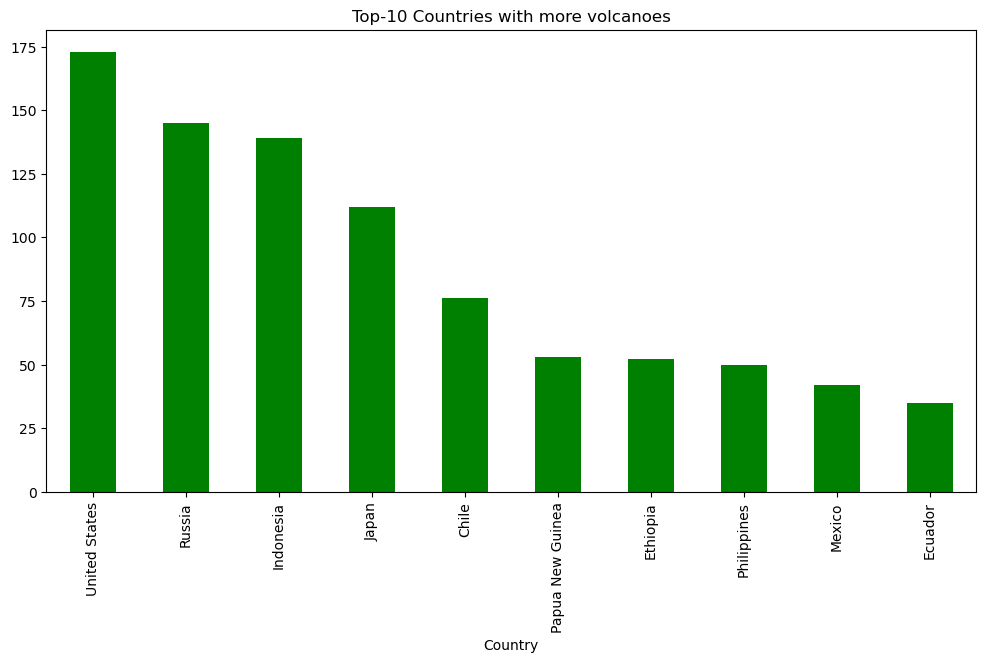

In [26]:
topten = df['Country'].value_counts().head(10)
topten.plot(kind='bar',
            color='green',
            title='Top-10 Countries with more volcanoes',
            figsize=(12, 6))
plt.show()

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Show the amount of volcanoes of each tectonic setting using a pie plot


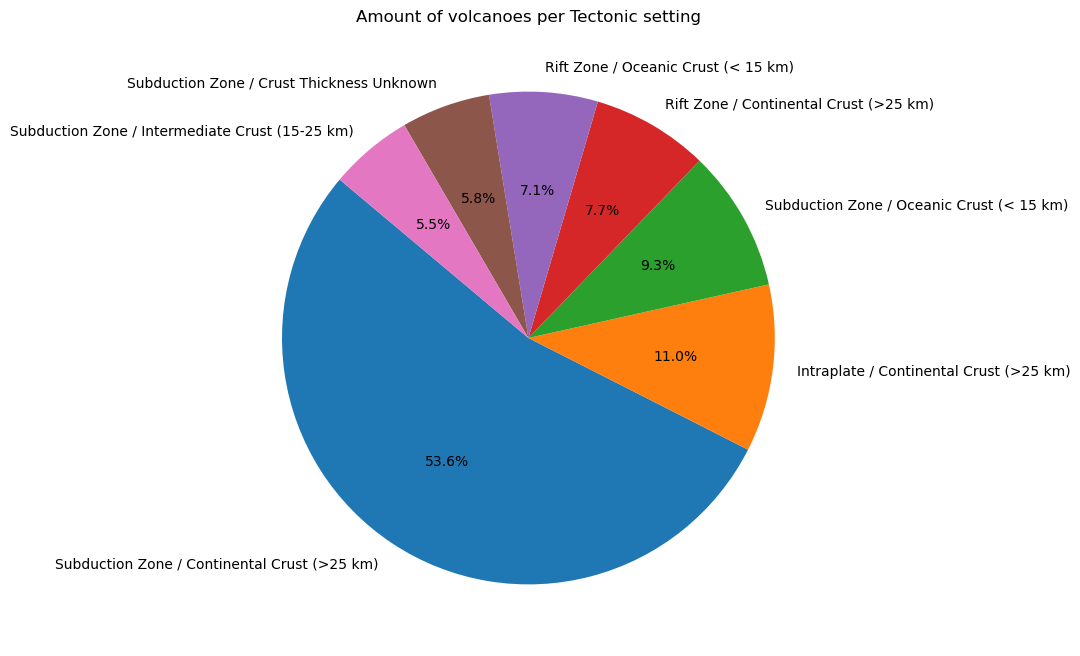

In [37]:
tectonic_counts = df['Tectonic Setting'].value_counts().head(7)

tectonic_counts.plot(kind='pie',
                 labels=tectonic_df.index,
                 autopct='%1.1f%%',
                 startangle=140,
                 title='Amount of volcanoes per Tectonic setting',
                 figsize=(8,8))
plt.ylabel('')
plt.show()

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Analyze volcanoes elevation using a Box plot

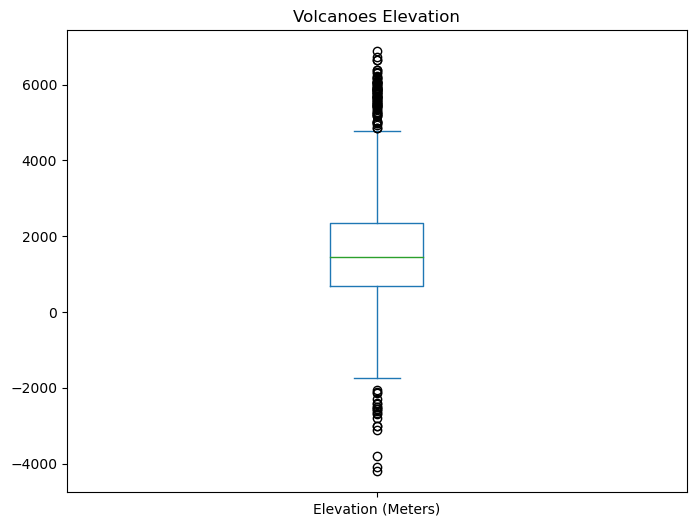

In [38]:
df['Elevation (Meters)'].plot(kind='box',
                              title='Volcanoes Elevation',
                              figsize=(8, 6))

plt.show()

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Over or under the sea?

Create a new `Under the sea` column which should have `True` if the volcanoe elevation is less than or equal to 0, `False` otherwise.

In [45]:
df['Under the sea'] = df['Elevation (Meters)'] <= 0
df.head(20)

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Under the sea
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar,Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km),False
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome,Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),False
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),False
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),False
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater,Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km),False
5,211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,104 BCE,42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),False
6,211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.730,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km),False
7,211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,1538 CE,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),False
8,211020,Vesuvius,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,1944 CE,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction Zone / Continental Crust (>25 km),False
9,211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302 CE,40.730,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),False


![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Show the amount of undersea volcanoes per Region using a bar plot


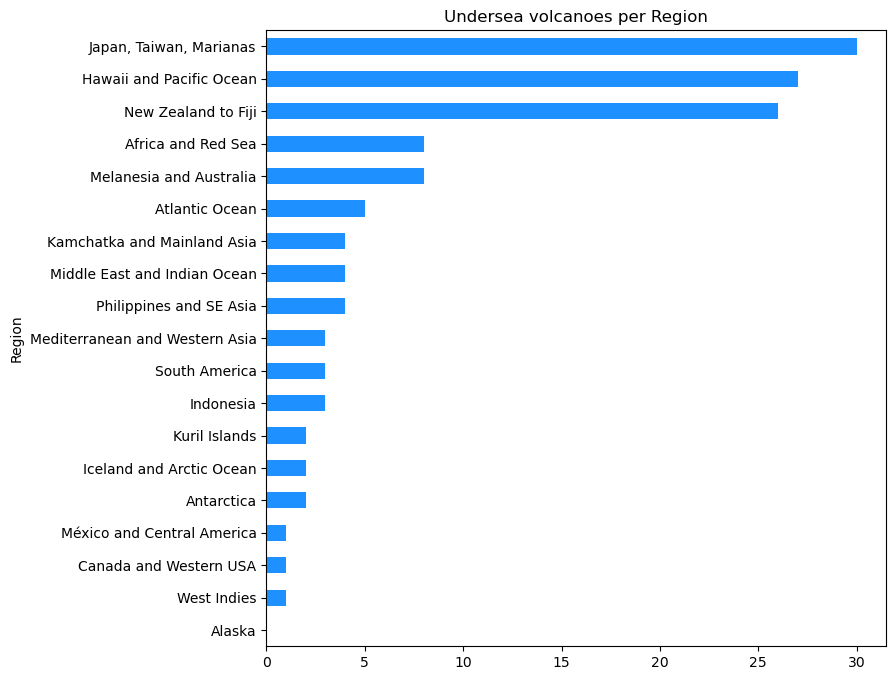

In [50]:
region_sea_df = df.groupby('Region').sum()['Under the sea'].sort_values()

# another possibility
#df.loc[df['Under the sea'] == True, :].groupby('Region').count()['Name'].sort_values()

region_sea_df.plot(kind='barh',
                   color='dodgerblue',
                   title='Undersea volcanoes per Region',
                   figsize=(8,8))

plt.show()


![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Show the distribution of the elevation of the volcanoes using an histogram

> Customize it! You can try different colors, different bins amount, alpha values, adding KDE, etc.

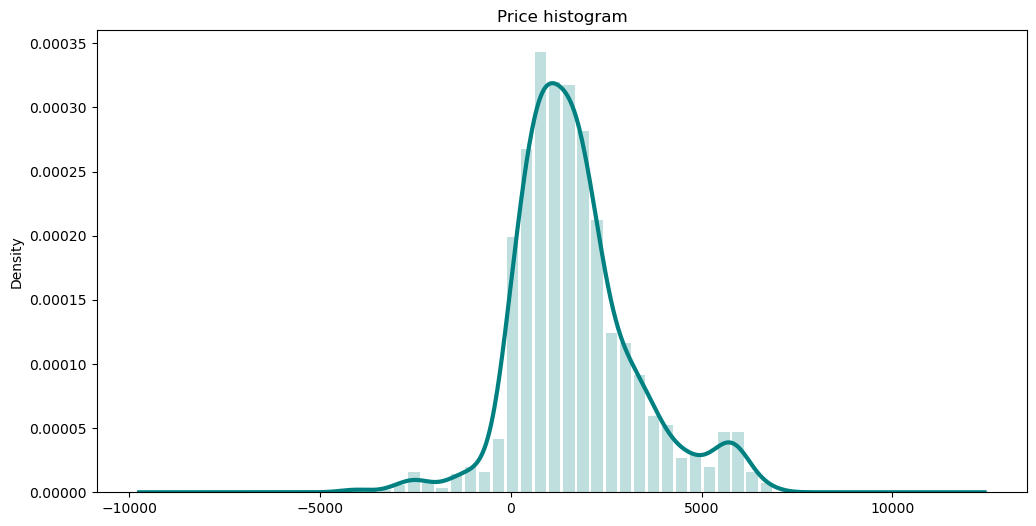

In [54]:
df['Elevation (Meters)'].plot(kind='hist',
                              rwidth=0.8,
                              color="teal",
                              bins=30,
                              density=True,
                              alpha=0.25,
                              title="Price histogram",
                              figsize=(12, 6))

df['Elevation (Meters)'].plot(kind='kde',
                              color='teal',
                              linewidth=3)

plt.show()

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Which are the highest volcanoes?

Create a bar plot showing the `Elevation (Meters)` per volcanoe `Type`.

> Customize it! You can try different bar colors or different bars orientation, etc.

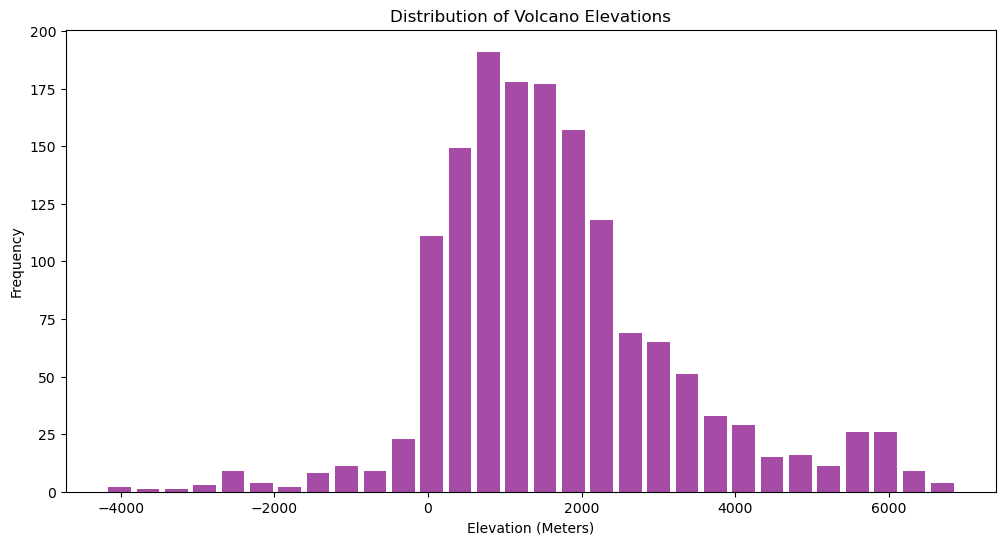

In [55]:
df['Elevation (Meters)'].plot(kind='hist',
                              bins=30,
                              rwidth=0.8,
                              color='purple',
                              alpha=0.7,
                              title='Distribution of Volcano Elevations',
                              figsize=(12, 6))

plt.xlabel('Elevation (Meters)')
plt.ylabel('Frequency')
plt.show()


![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)